# Analiza Pokemonów

## To do
1. Na podstawie inormacji zawartych w DB wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.
2. Heatmapa Efektywności typów względem siebie
3. Pokazanie statystyk pokemona i jak imają się do typów[pokazać to na jednej strone z wieloma grafami] pokazać średnią i odstające wyniki. Czy typ ma znaczenie na statystyki
4. to samo co 3 pkcie ale tu z dwoma typami 
5. pokazać czy typ pokemona ma znaczenie na % danej płci, i ogólnikowe wystepowanie danej płci wszsytkich pokemonów ile pokemonów nie ma płci
6. pokazać co ma znaczenie przy zdobywaniu doświadzczenia
7. czy typ pokemona ma znaczenia na jego wzrost i wagę
8. pokazać co ma znaczenie przy łapaniu pokemona
9. pokazać jakie pokemony legendarne powstały i ile ich jest na podstawie typu i jakie potencjalne legendarne pokemony można stworzyć w przyszych generacjach
10. na podstawie wagi wzrostu i typu sprawdzić korelacje miedzy danymi 
11. konwersja statystyk do Pokemon Go
12. pokazać różnicę w statystykach gier pokemon z pokemon go

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure as fig
from matplotlib import colorbar as cb
import seaborn as sns
import scipy as sc
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator

#Słownik Typów i odpowadającym im kolorów
pokemon_colors = {
    'Bug': '#A8B820',
    'Electric': '#F8D030',
    'Fairy': '#EE99AC',
    'Fighting': '#C03028',
    'Fire': '#F08030',
    'Flying': '#A890F0',
    'Grass': '#78C850',
    'Ice': '#98D8D8',
    'Poison': '#A040A0',
    'Psychic': '#F85888',
    'Rock': '#B8A038',
    'Steel': '#B8B8D0',
    'Water': '#6890F0',
    'Dragon': '#7038F8',
    'Dark': '#705848',
    'Ghost': '#705898',
    'Ground': '#E0C068',
    'Normal': '#A8A878'
}

### Wczytanie bazy danych

In [97]:
PokemonDB = pd.read_csv(r'PokemonDB_updated.csv')

### Random state na podstawie numeru w pokedesie

In [98]:
rs = PokemonDB[PokemonDB['name'] == 'Pikachu']['pokedex_number'].values[0]

### Informacje na temat PokemonDB

In [99]:
PokemonDB.head()

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


### Wczytanie bazy danych typing_chart.csv i wypełnienie pustych komórek jedynkami

In [100]:
TypingChart = pd.read_csv(r'Typing_Chart.csv',index_col=0)
TypingChart = TypingChart.fillna(1)
TypingChart = TypingChart.sort_index(axis =  1)
TypingChart = TypingChart.sort_index()
TypingChart


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Types,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0
Fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2.0,0.5,0.5,2.0,2.0,1.0
Fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.5,2.0,0.5
Flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0
Ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0


### TypingChart to tablica w której są zapisane słąbości i mocne strony każdego z typów

In [101]:
TypingChart.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Types,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0


## Grupowanie pokemonów względem Głównego typu i zliczenie ich

In [102]:
df = PokemonDB[PokemonDB['type2'].isna()]
df = df['type1'].value_counts().reset_index()
df

,type1,count
0,Normal,61
1,Water,61
2,Grass,37
3,Psychic,35
4,Fire,27
5,Electric,26
6,Fighting,22
7,Bug,18
8,Fairy,16
9,Poison,13


## Grupowanie pokemonów z dwoma typami i zgrupowanie ich na podstawie typu Głównego

In [103]:
type1_and_type2 = PokemonDB[PokemonDB['type2'].notna()]

# Liczba Pokémonów tylko z typem pierwszym i drugim
type_combination_counts = type1_and_type2.groupby(['type1', 'type2']).size().reset_index(name='count')
print("\nLiczba Pokémonów z type1 i type2:")
type_combination_counts.sample(5,random_state=rs)


Liczba Pokémonów z type1 i type2:


,type1,type2,count
111,Psychic,Steel,1
97,Poison,Dark,3
108,Psychic,Flying,6
65,Grass,Grass,1
41,Fire,Fighting,6


### Stworzenie uproszczonej bazy danych z wagą pokemonów

In [104]:
weightsDB = PokemonDB.loc[:,["pokedex_number","type1","type2","weight_kg"]]
weightsDB['weight_kg'] = pd.to_numeric(weightsDB["weight_kg"])
weightsDB.to_csv(r'WeightsDB.csv')

weightsDB

,pokedex_number,type1,type2,weight_kg
0,1,Grass,Poison,6.9
1,2,Grass,Poison,13.0
2,3,Grass,Poison,100.0
3,4,Fire,NaN,8.5
4,5,Fire,NaN,19.0
...,...,...,...,...
796,797,Steel,Flying,999.9
797,798,Grass,Steel,0.1
798,799,Dark,Dragon,888.0
799,800,Psychic,NaN,230.0


In [105]:
weightsDB.sample()

,pokedex_number,type1,type2,weight_kg
414,415,Bug,Flying,5.5


### Zliczenie pokwmonów  na podstawie dystrybucji typów

In [106]:
two_typesdb = PokemonDB.dropna(subset=['type2'])
two_typesdb.to_csv(r'Two_typesDB.csv')

count = two_typesdb['pokedex_number'].count()

print(f'Pokemonów z dwoma typami w 7 generacjach jest łącznie {count}')
two_typesdb.sample(5,random_state=rs)

Pokemonów z dwoma typami w 7 generacjach jest łącznie 417


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
39,40,Wigglytuff,1,Normal,Fairy,Balloon Pokémon,0,70,85,45,...,0.0,1.00,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
138,139,Omastar,1,Rock,Water,Spiral Pokémon,0,60,115,125,...,1.0,4.00,2.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0
187,188,Skiploom,2,Grass,Flying,Cottonweed Pokémon,0,45,45,50,...,1.0,0.25,0.0,4.0,1.0,2.0,1.0,2.0,1.0,0.5
767,768,Golisopod,7,Bug,Water,Hard Scale Pokémon,0,125,60,140,...,1.0,1.00,0.5,0.5,1.0,1.0,1.0,2.0,0.5,0.5
585,586,Sawsbuck,5,Normal,Grass,Season Pokémon,0,100,60,70,...,0.0,0.50,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [107]:
one_typedb = PokemonDB[PokemonDB['type2'].isna()].fillna('')
one_typedb.to_csv(r'One_typeDB.csv')

count = one_typedb['pokedex_number'].count()

print(f'Pokemonów z jednym typem w 7 generacjach jest łącznie {count}')
one_typedb.sample(5,random_state=rs)

Pokemonów z jednym typem w 7 generacjach jest łącznie 384


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
711,712,Bergmite,6,Ice,,Ice Chunk Pokémon,0,69,32,85,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
670,671,Florges,6,Fairy,,Garden Pokémon,0,65,112,68,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
613,614,Beartic,5,Ice,,Freezing Pokémon,0,130,70,80,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
761,762,Steenee,7,Grass,,Fruit Pokémon,0,40,40,48,...,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5
357,358,Chimecho,3,Psychic,,Wind Chime Pokémon,0,50,95,80,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


## 1. Na podstawie inormacji zawartych w DB można wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.

In [108]:
pivot_df = type_combination_counts.pivot(index='type1', columns='type2', values='count').fillna(0)
pivot_df

type2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.0,0.0,4.0,2.0,3.0,2.0,13.0,1.0,6.0,1.0,0.0,0.0,11.0,0.0,3.0,5.0,3.0
Dark,0.0,0.0,4.0,0.0,0.0,2.0,2.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
Electric,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
Fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
Fire,0.0,1.0,1.0,0.0,0.0,6.0,1.0,6.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0
Flying,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,0.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,5.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


## Graf słupkowy zestakowany, przedstawia dystrybucje typów pokemonów 

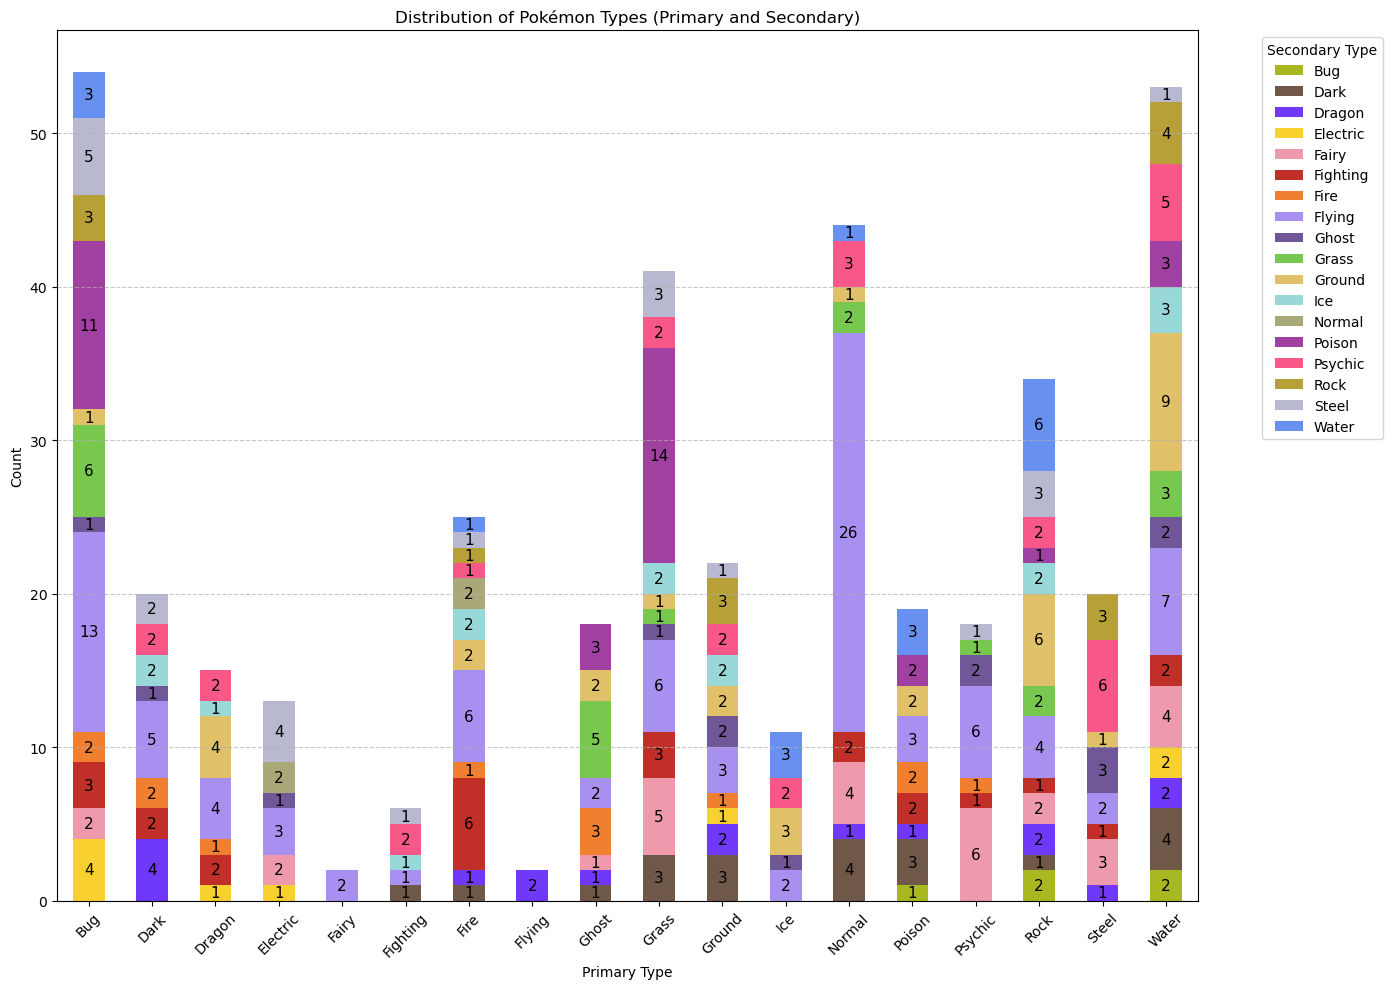

In [109]:
colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

#for container in ax.containers:
#    # Add labels to each bar in the container
#    ax.bar_label(container, label_type='center')
    
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)

    
plt.title('Distribution of Pokémon Types (Primary and Secondary)')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Secondary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Podobnie jak wyżej w grafie słupkowym tak jak i na Heat mapie widzimy jak ma się dystrybucja każdego z typów

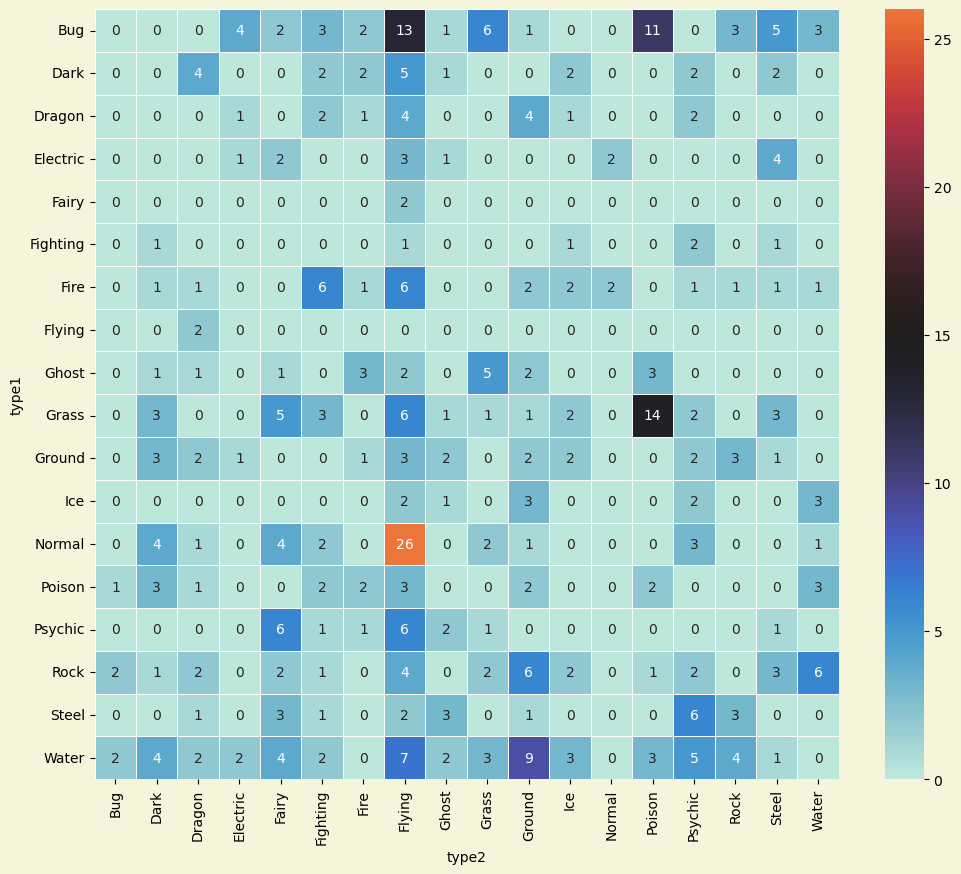

In [110]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(pivot_df ,annot= True ,cmap="icefire",linewidths=.5,center=15)
fig.patch.set_facecolor('beige')


### W trakcie pracy na tej bazie danych zauważyłem że jeden z pokemonów ma type1 taki sam jak type2. Jest to pokemon z pokemon_indexem = 491. Wykorzystałem ten niby błąd o utworzenia zbiorczego wykresu i heatmapy.

In [111]:
PokemonDB.query('type1 == "Grass" & type2 == "Grass"')

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
491,492,Shaymin,4,Grass,Grass,Gratitude Pokémon,1,103,120,75,...,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [112]:
df= PokemonDB.loc[491]
df

pokedex_number                     492
name                           Shaymin
generation                           4
type1                            Grass
type2                            Grass
classfication        Gratitude Pokémon
is_legendary                         1
attack                             103
sp_attack                          120
defense                             75
sp_defense                          75
hp                                 100
speed                              127
base_total                         600
height_m                           0.2
weight_kg                          2.1
percentage_male                    NaN
capture_rate                        45
experience_growth              1059860
against_bug                        2.0
against_dark                       1.0
against_dragon                     1.0
against_electric                   0.5
against_fairy                      1.0
against_fight                      1.0
against_fire             

### [Debuging?] Wyszukiwanie duplikatów w kolumnie type1 i type2 i zamiana ich na NaN

In [113]:
#condition = PokemonDB['type1'] == PokemonDB['type2']
#PokemonDB.loc[condition, 'type2'] = np.nan
#PokemonDB.loc[491]

In [114]:
#type1_and_type2 = PokemonDB[PokemonDB['type2'].notna()]
#
## Liczba Pokémonów tylko z typem pierwszym i drugim
#type_combination_counts = type1_and_type2.groupby(['type1', 'type2']).size().reset_index(name='count')
#type_combination_counts.sample(5,random_state=rs)

### do pokemonów bez typu pobocznego dodałem tam duplikat typu głównego aby wykorzystać te inforamcje na wizualizacjach

In [115]:
condition = PokemonDB['type2'].isna()
PokemonDB2 = PokemonDB
PokemonDB2.loc[condition, 'type2'] = PokemonDB['type1']
PokemonDB2.loc[491,["name","type1","type2"]]

name     Shaymin
type1      Grass
type2      Grass
Name: 491, dtype: object

### Poprawiony graf słupkowy

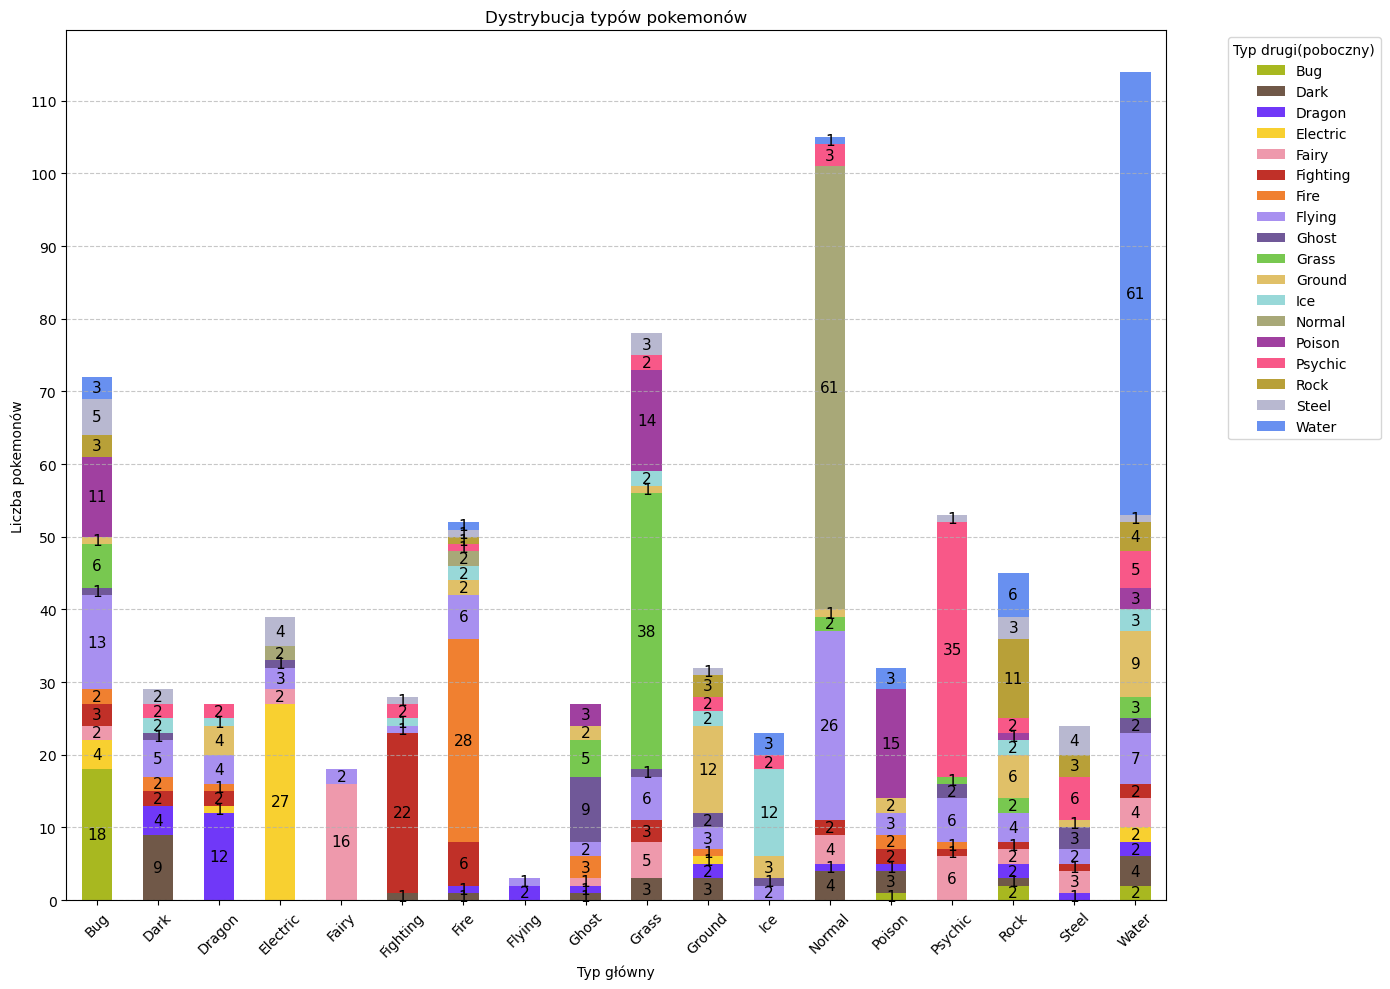

In [116]:
type_combination_counts = PokemonDB2.groupby(['type1', 'type2']).size().reset_index(name='count')

pivot_df = type_combination_counts.pivot(index='type1', columns='type2', values='count').fillna(0)

colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)
        
ax.yaxis.set_major_locator(MultipleLocator(10))

plt.title('Dystrybucja typów pokemonów')
plt.xlabel('Typ główny')
plt.ylabel('Liczba pokemonów')
plt.xticks(rotation=45)
plt.legend(title='Typ drugi(poboczny)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Poprawiona heatmapa

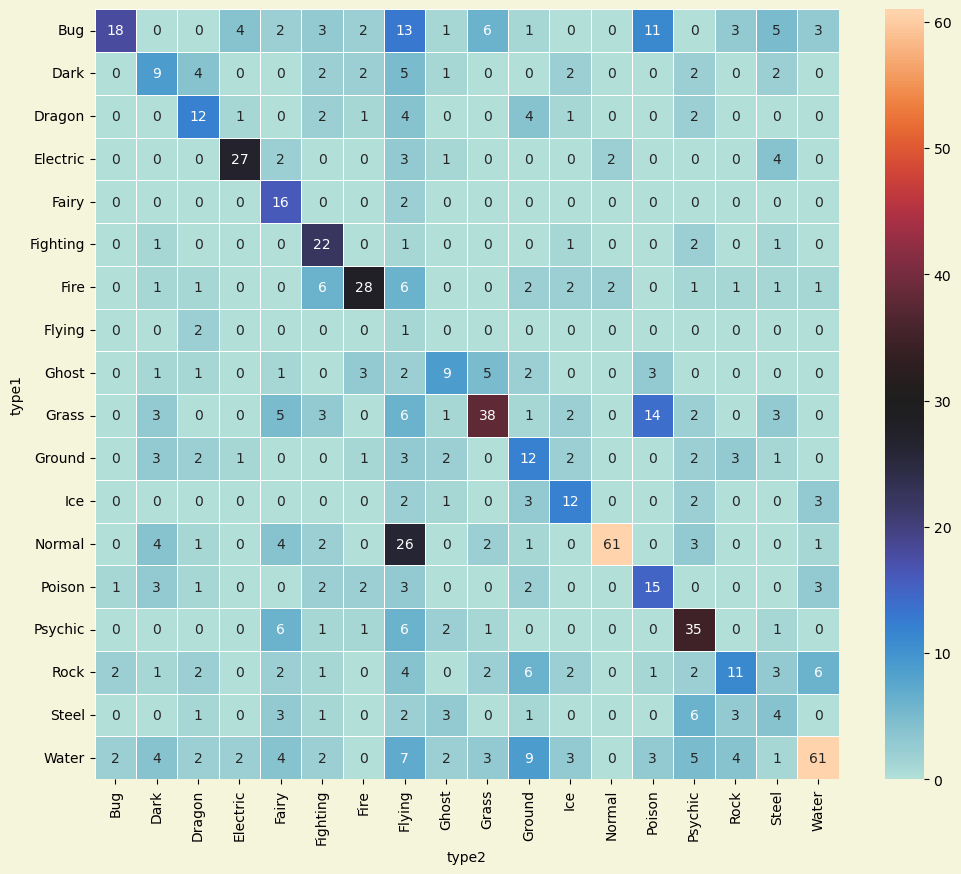

In [117]:
fig, ax = plt.subplots(figsize=(12,10))
color = sns.color_palette("icefire", as_cmap=True)
ax = sns.heatmap(pivot_df ,annot=True, cmap=color ,linewidths=.5,center=30)
sns.color_palette("cubehelix")
fig.patch.set_facecolor('beige')


## 2. Heatmapa Efektywności typów względem siebie 
### Zwizualizowanie tablicy Typing_Chart za pomocą Heatmapy gdzie możemy zaobserwować silne i słabsze strony każdego z typów

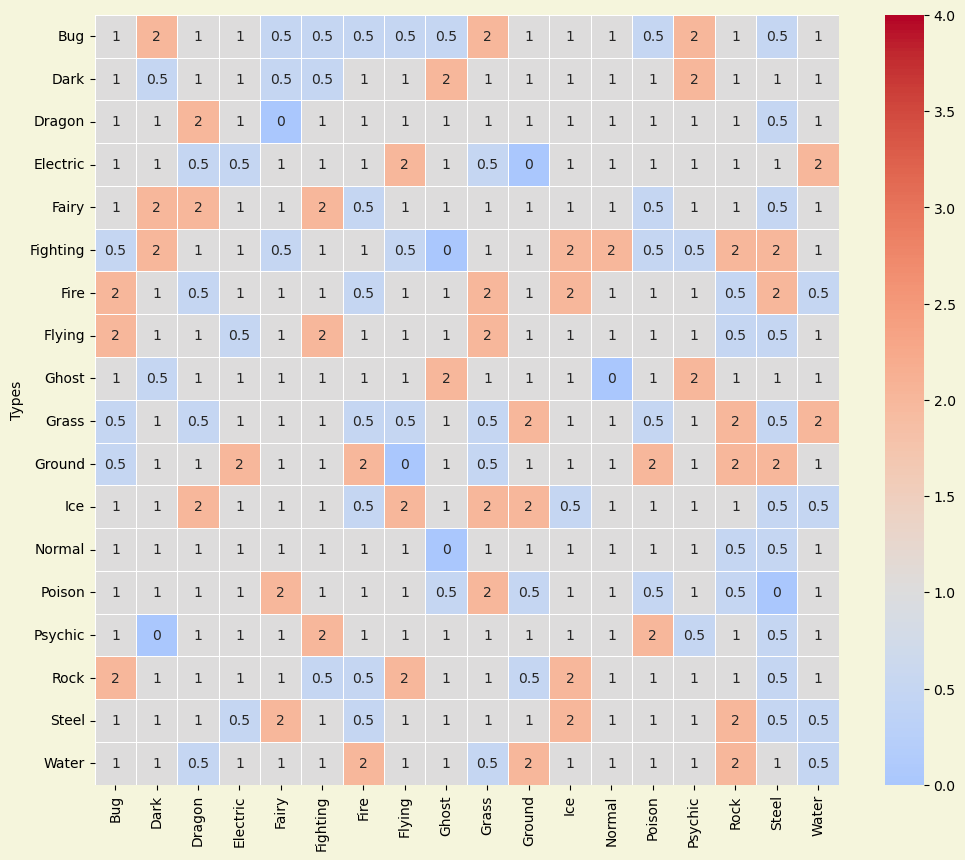

In [118]:
#colors = ['plum','lightblue','khaki', 'lightgreen']
colors = sns.color_palette("coolwarm", as_cmap=True)

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(TypingChart ,annot= True, cmap=colors ,linewidths=.5,center=1,vmax=4)
fig.patch.set_facecolor('beige')

### 3. Korelacja typów i statystyk

In [119]:
one_typedb

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
3,4,Charmander,1,Fire,,Lizard Pokémon,0,52,60,43,...,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,,Flame Pokémon,0,64,80,58,...,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
6,7,Squirtle,1,Water,,Tiny Turtle Pokémon,0,48,50,65,...,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
7,8,Wartortle,1,Water,,Turtle Pokémon,0,63,65,80,...,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
8,9,Blastoise,1,Water,,Shellfish Pokémon,0,103,135,120,...,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,782,Jangmo-o,7,Dragon,,Scaly Pokémon,0,55,45,65,...,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
788,789,Cosmog,7,Psychic,,Nebula Pokémon,1,29,29,31,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
789,790,Cosmoem,7,Psychic,,Protostar Pokémon,1,29,29,131,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
795,796,Xurkitree,7,Electric,,Glowing Pokémon,1,89,173,71,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [120]:
one_typedb.head()

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
3,4,Charmander,1,Fire,,Lizard Pokémon,0,52,60,43,...,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,,Flame Pokémon,0,64,80,58,...,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
6,7,Squirtle,1,Water,,Tiny Turtle Pokémon,0,48,50,65,...,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
7,8,Wartortle,1,Water,,Turtle Pokémon,0,63,65,80,...,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
8,9,Blastoise,1,Water,,Shellfish Pokémon,0,103,135,120,...,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5


In [121]:
type_stats = one_typedb[['type1','attack','sp_attack','defense','sp_defense','hp','speed']]
type_stats = type_stats.groupby('type1').mean()
type_stats.to_csv('type_stats.csv')
type_stats

,attack,sp_attack,defense,sp_defense,hp,speed
type1,,,,,,
Bug,52.666667,40.722222,58.166667,45.944444,52.722222,48.944444
Dark,84.222222,82.000000,61.333333,61.888889,60.000000,83.555556
Dragon,89.083333,58.583333,66.916667,69.416667,60.416667,59.500000
Electric,69.730769,82.230769,56.500000,67.038462,60.500000,82.692308
Fairy,64.250000,79.187500,65.437500,85.000000,74.437500,52.875000
Fighting,97.454545,42.636364,63.681818,62.045455,71.363636,59.500000
Fire,77.370370,76.851852,57.592593,63.000000,61.111111,71.407407
Flying,100.000000,110.000000,80.000000,90.000000,79.000000,121.000000
Ghost,72.222222,72.333333,90.555556,92.333333,47.666667,51.666667


,attack,sp_attack,defense,sp_defense,hp,speed
attack,1.000000,-0.107638,0.401263,-0.034310,0.379993,0.156839
sp_attack,-0.107638,1.000000,-0.085474,0.614081,0.191304,0.768043
defense,0.401263,-0.085474,1.000000,0.467679,-0.008692,-0.295295
sp_defense,-0.034310,0.614081,0.467679,1.000000,0.108249,0.275621
hp,0.379993,0.191304,-0.008692,0.108249,1.000000,0.262257
speed,0.156839,0.768043,-0.295295,0.275621,0.262257,1.000000


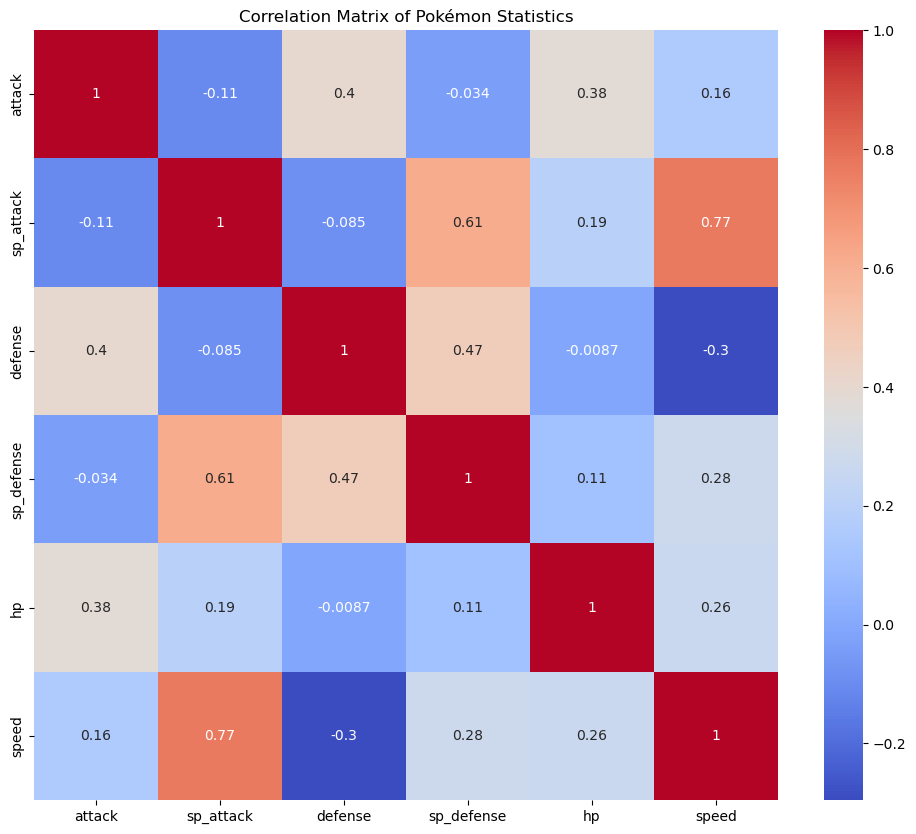

In [122]:
correlation_matrix = type_stats.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Statistics')
correlation_matrix

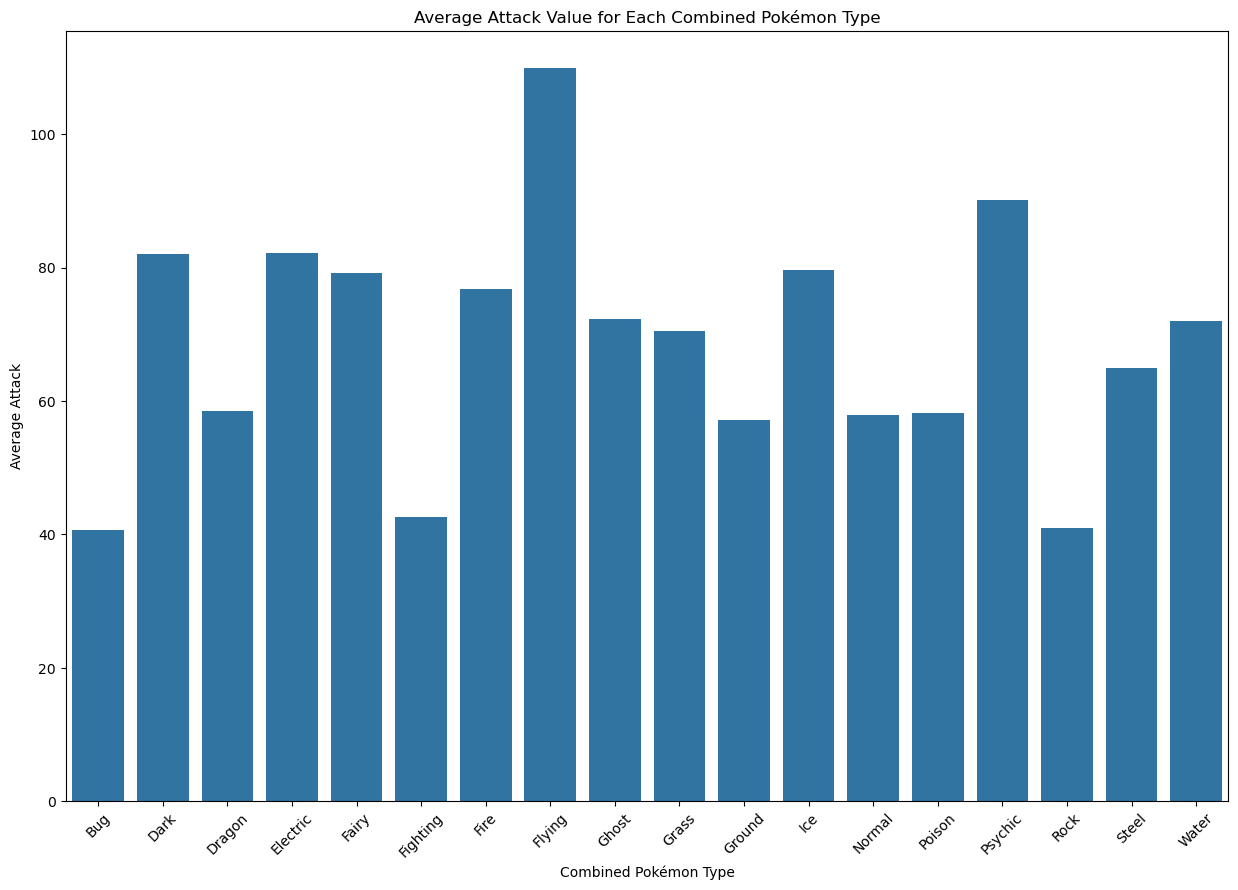

In [123]:
# Visualize the average statistics for each combined type
plt.figure(figsize=(15, 10))

# Create a bar plot for the average Attack values
sns.barplot(data=type_stats, x='type1', y='sp_attack')
plt.title('Average Attack Value for Each Combined Pokémon Type')
plt.xlabel('Combined Pokémon Type')
plt.ylabel('Average Attack')
plt.xticks(rotation=45)
plt.show()

In [ ]:
PokemonDB['CombineTypes'] = po